In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=774d87de9e7ce7b6c2d678640156468773053c5ebf7a46a484c3b674f6946c83
  Stored in directory: c:\users\sambo\appdata\local\pip\cache\wheels\fb\0e\65\da65ce669381fc01b6ef990d301d3586991f89bff1175877a4
Successfully built ppscore


In [672]:
import plotly.graph_objs as go # interactive plotting library
import plotly.express as px # interactive plotting library
from plotly.subplots import make_subplots
from IPython.display import display
import ppscore as pps
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [673]:
!pip install imblearn

In [674]:
from scipy.stats import describe
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced

In [675]:
!pip install xgboost

In [676]:
!pip install lightgbm

In [677]:
!pip install catboost

In [678]:
!pip install mlxtend

In [679]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import sklearn.metrics
from sklearn.pipeline import Pipeline as sk_Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from mlxtend.plotting import plot_confusion_matrix

In [707]:
df = pd.read_csv('caravan-insurance-challenge.csv')

In [708]:
RS = 40 # random state

In [709]:
df.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [710]:
df.ORIGIN.value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [711]:
train_set = df.ORIGIN == 'train'
test_set = df.ORIGIN == 'test'
df.drop(columns=['ORIGIN'], inplace=True)
#seperating training and test sets from the data

<AxesSubplot:ylabel='CARAVAN'>

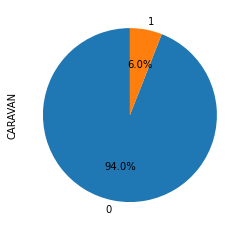

In [712]:
df.CARAVAN.value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

#heavy imbalance with the dataset, about 6% have a caravan insurance policy

In [713]:
df.info()
#Variables beginning with M refer to demographic statistics of the postal code, 
#while variables beginning with P and A (as well as CARAVAN, the target variable) refer to 
#product ownership and insurance statistics in the postal code.


#All values are not null and stored as integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   9822 non-null   int64
 1   MAANTHUI  9822 non-null   int64
 2   MGEMOMV   9822 non-null   int64
 3   MGEMLEEF  9822 non-null   int64
 4   MOSHOOFD  9822 non-null   int64
 5   MGODRK    9822 non-null   int64
 6   MGODPR    9822 non-null   int64
 7   MGODOV    9822 non-null   int64
 8   MGODGE    9822 non-null   int64
 9   MRELGE    9822 non-null   int64
 10  MRELSA    9822 non-null   int64
 11  MRELOV    9822 non-null   int64
 12  MFALLEEN  9822 non-null   int64
 13  MFGEKIND  9822 non-null   int64
 14  MFWEKIND  9822 non-null   int64
 15  MOPLHOOG  9822 non-null   int64
 16  MOPLMIDD  9822 non-null   int64
 17  MOPLLAAG  9822 non-null   int64
 18  MBERHOOG  9822 non-null   int64
 19  MBERZELF  9822 non-null   int64
 20  MBERBOER  9822 non-null   int64
 21  MBERMIDD  9822 non-null   int64
 22  

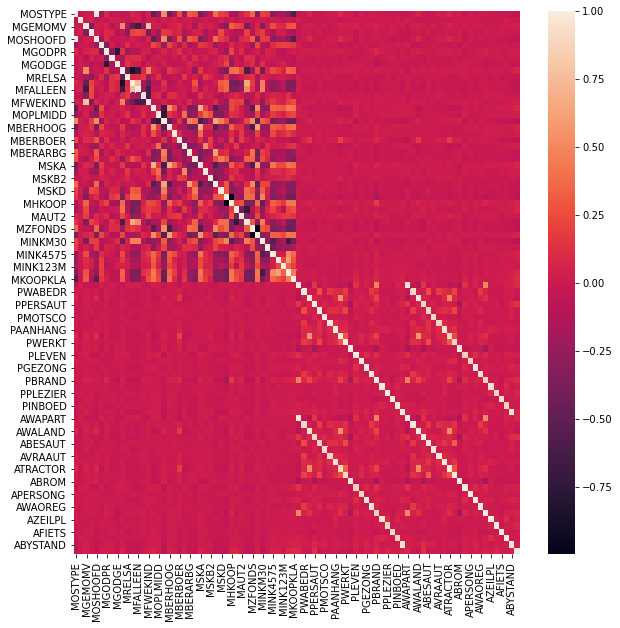

In [714]:
df_corr = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr());
#A correlation plot shows some interesting patterns in the data.There is a clear divide between the two groupings listed in the description file .

<ipython-input-715-01d27072ce98>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


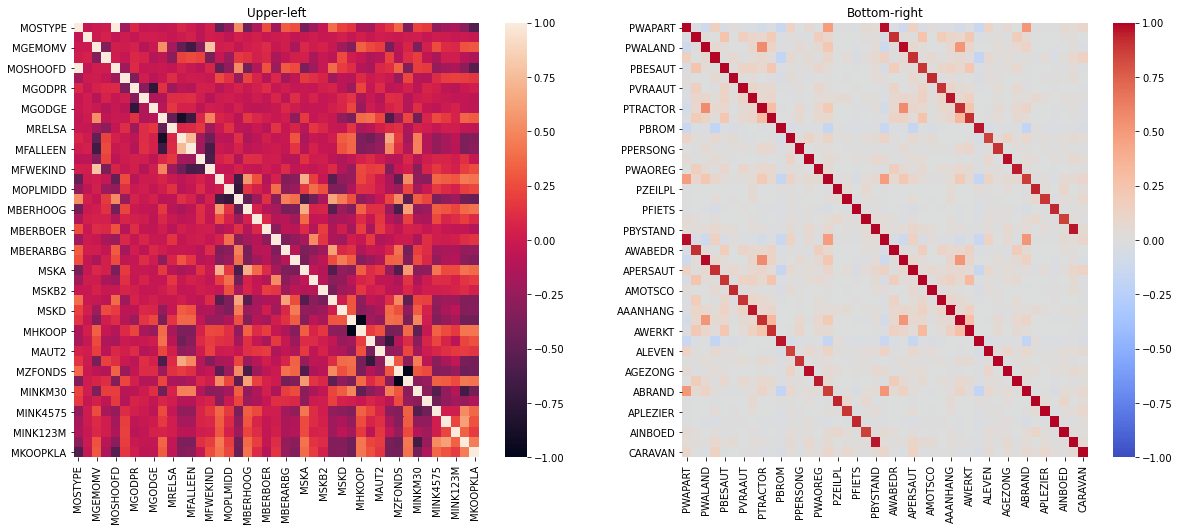

In [715]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.iloc[:,:43].corr(),vmin=-1,vmax=1,ax=axes[0])
sns.heatmap(df.iloc[:,43:].corr(),vmin=-1,vmax=1,cmap='coolwarm',ax=axes[1])
axes[0].set_title("Upper-left")
axes[1].set_title("Bottom-right")
fig.show()
#Bottom-right corrplot shows how variables starting with P each have a corresponding variable starting with 
#A this means that having both in our data will likely provide little value.

In [716]:
#lower right heatmap shows a vary strong correlation with elements starting with 'A' and their 'P' counterparts
#over a 95% similarity for each matching feature shows that having both is somewhat redundent
# eg. PWAPART and AWAPART describe 'contribution private third party insurance' and 
    # 'Number of private third party insurance' for a given postal code. It is expected that these values are very similar

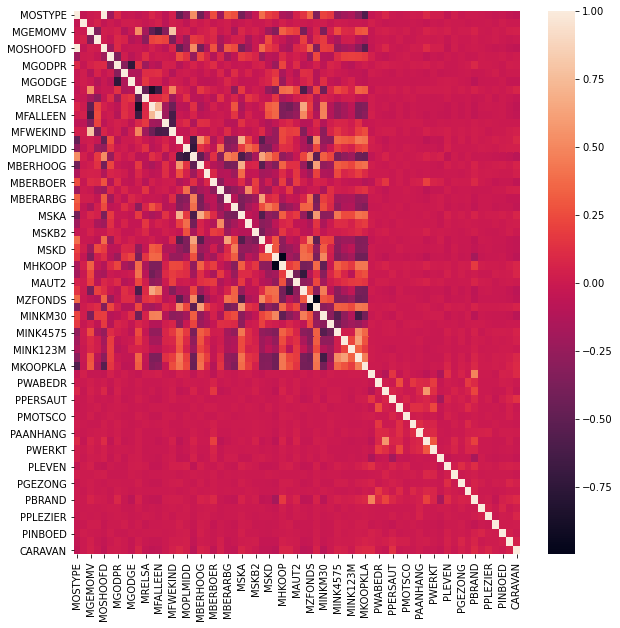

In [717]:
selected_features = df_corr.columns[~pd.Series(df_corr.columns).str.startswith('A')]
selected_corr = df_corr.loc[selected_features, selected_features]
plt.subplots(figsize=(10,10))
sns.heatmap(selected_corr);

In [718]:
data_np=df.drop(columns=df.loc[:,(df.columns.str.startswith('p'))]).copy()
data_np.to_feather('reduced_cmbd.df')

In [719]:
dfs = df[selected_features]
dfs.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,5,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,2,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,2,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,2,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,6,0,0,0,0,0,0


In [720]:
corr_target = selected_corr.iloc[-1, :-1]
corr_target.max()
# now the max correlation of any feature and CARAVAN is .137

0.13705338138086126

In [721]:
p_feature_vector = corr_target[np.abs(corr_target) >=0.05]
print(p_feature_vector.shape)
p_feature_vector

(27,)


MOSTYPE    -0.060742
MOSHOOFD   -0.059306
MRELGE      0.067168
MRELOV     -0.058787
MFALLEEN   -0.054349
MOPLHOOG    0.084373
MOPLLAAG   -0.084835
MBERHOOG    0.058354
MBERBOER   -0.057811
MBERARBO   -0.053767
MSKA        0.064810
MSKD       -0.050652
MHHUUR     -0.075743
MHKOOP      0.075283
MAUT1       0.070665
MAUT0      -0.073395
MZFONDS    -0.060607
MZPART      0.059902
MINKM30    -0.079035
MINK4575    0.061853
MINKGEM     0.085122
MKOOPKLA    0.099018
PWAPART     0.098757
PPERSAUT    0.137053
PBRAND      0.096709
PPLEZIER    0.075779
PBYSTAND    0.053482
Name: CARAVAN, dtype: float64

## Split Train and Test data

In [722]:
X = dfs.drop(columns='CARAVAN')
y = dfs.CARAVAN

In [723]:
X_train = X[train_set]
y_train = y[train_set]
X_test = X[test_set]
y_test = y[test_set]

## Balancing

In [724]:
ros = RandomOverSampler(random_state=RS)
rus = RandomUnderSampler(random_state=RS)
smote_sampler = SMOTE(random_state=RS, n_jobs=-1)
X_under,y_under = rus.fit_resample(X_train,y_train)
X_over,y_over = ros.fit_resample(X_train,y_train)
X_smote,y_smote = smote_sampler.fit_resample(X_train,y_train)

In [725]:
imbalance_correction_results= pd.DataFrame(pd.DataFrame([*map(lambda x:describe(x)._asdict(),
                                                              [y_train,y_under,y_over,y_smote])],
                                                        index=['Unbalanced','Undersample','Oversample','SMOTE']))
imbalance_correction_results

,nobs,minmax,mean,variance,skewness,kurtosis
Unbalanced,5822,"(0, 1)",0.059773,0.056210,3.713955,11.793458
Undersample,696,"(0, 1)",0.500000,0.250360,0.000000,-2.000000
Oversample,10948,"(0, 1)",0.500000,0.250023,0.000000,-2.000000
SMOTE,10948,"(0, 1)",0.500000,0.250023,0.000000,-2.000000


In [726]:
y_train.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [727]:
y_smote.value_counts()

0    5474
1    5474
Name: CARAVAN, dtype: int64

## Models

In [728]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [729]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators =20,max_depth = 2 ,bootstrap=True)
lr = LogisticRegression(random_state=RS, max_iter=9999)

## Random Forest

RFC Accuracy:  0.70975
              precision    recall  f1-score   support

           0       0.96      0.72      0.82      3762
           1       0.11      0.52      0.18       238

    accuracy                           0.71      4000
   macro avg       0.53      0.62      0.50      4000
weighted avg       0.91      0.71      0.79      4000



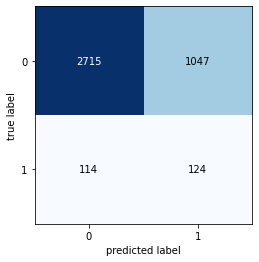

In [730]:
from sklearn.ensemble import RandomForestClassifier
rfc.fit(X_smote,y_smote)
y_predict_rfc = rfc.predict(X_test)
print('RFC Accuracy: ', rfc.score(X_test,y_test))
print(classification_report(y_test,y_predict_rfc))
cf_rf = confusion_matrix(y_test,y_predict_rfc)
plot_confusion_matrix(conf_mat=cf_rf);

## K Near Neighbors

KNN Accuracy:  0.91025
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3762
           1       0.15      0.11      0.12       238

    accuracy                           0.91      4000
   macro avg       0.55      0.53      0.54      4000
weighted avg       0.90      0.91      0.90      4000



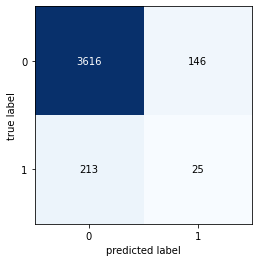

In [731]:
scaler = StandardScaler()
X_smote = scaler.fit_transform(X_smote)

KNN_y_pred = knn.fit(X_smote,y_smote).predict(X_test)
confusion_matrix(y_test, KNN_y_pred)
print('KNN Accuracy: ', knn.score(X_test,y_test))
print(classification_report(y_test, KNN_y_pred))
cf_knn = confusion_matrix(y_test,KNN_y_pred)
plot_confusion_matrix(conf_mat=cf_knn);

In [732]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

k = len(X)
kf = KFold(n_splits=k, random_state=None)
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    rfc.fit(X_train,y_train)
    pred_values = rfc.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

print('Avg Random Forest accuracy : {}'.format(avg_acc_score))

Avg Random Forest accuracy : 0.9403380166972104


In [733]:
acc_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    knn.fit(X_train,y_train)
    pred_values = knn.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

print('Avg KNN accuracy : {}'.format(avg_acc_score))

Avg KNN accuracy : 0.9305640399104053
